<a href="https://colab.research.google.com/github/guangyitan/ImageProcessing-FaceMaskClassification/blob/main/Train_MobileNetV2_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Setting GPU-enabled Tensorflow
import tensorflow as tf

# physical_devices = tf.config.list_physical_devices('GPU') 
# for device in physical_devices:
#     tf.config.experimental.set_memory_growth(device, True)

# configuration = tf.compat.v1.ConfigProto()
# configuration.gpu_options.allow_growth = True
# session = tf.compat.v1.Session(config=configuration)
# set_session(session)

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
      print("sucessful")
  except RuntimeError as e:
    print(e)

sucessful


In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11505758705091529038
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1304061134
locality {
  bus_id: 1
  links {
  }
}
incarnation: 5664611217237688376
physical_device_desc: "device: 0, name: GeForce MX450, pci bus id: 0000:5a:00.0, compute capability: 7.5"
]


In [ ]:
# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4196426755126743830
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1304061134
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11367299144474703245
physical_device_desc: "device: 0, name: GeForce MX450, pci bus id: 0000:5a:00.0, compute capability: 7.5"
]


In [ ]:
# # import tensorflow as tf
# print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# # Check available GPU devices.
# print("The following GPU devices are available: %s" % tf.config.experimental.list_physical_devices("GPU"))
# print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

In [ ]:
import os
import re
import numpy as np
# import tensorflow as tf
from glob import glob
from matplotlib import pyplot as plt
# from PIL import Image
from tqdm import tqdm

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
# from tensorflow.keras.applications import DenseNet169
# from tensorflow.keras.applications import DenseNet201
# from tensorflow.keras.applications import ResNet152V2
# from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report

In [ ]:
# # Check available GPU devices.
# print("The following GPU devices are available: %s" % tf.config.experimental.list_physical_devices("GPU"))
# print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

The following GPU devices are available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Num GPUs Available:  1


In [ ]:
dataset_directory =os.path.join(os.getcwd(),"Dataset")
print(dataset_directory)

# get path for all correctly worn face mask
correct_mask_paths = []
correctMask_dataset_directory = os.path.join(dataset_directory, "Correct_Mask")
print(correctMask_dataset_directory)
for path_a in os.listdir(correctMask_dataset_directory):
    correct_mask_paths.append(os.path.join(correctMask_dataset_directory, path_a))

# get path for all no face mask
no_mask_paths = []
noMask_dataset_directory = os.path.join(dataset_directory, "No_Mask")
print(noMask_dataset_directory)
for path_a in os.listdir(noMask_dataset_directory):
    no_mask_paths.append(os.path.join(noMask_dataset_directory, path_a))

d:\User\UM\FSKTM\Sem 7\WID3008 IMAGE PROCESSING\Assignment\Codes\Dataset
d:\User\UM\FSKTM\Sem 7\WID3008 IMAGE PROCESSING\Assignment\Codes\Dataset\Correct_Mask
d:\User\UM\FSKTM\Sem 7\WID3008 IMAGE PROCESSING\Assignment\Codes\Dataset\No_Mask


In [ ]:
incorrectMask_dataset_directory = os.path.join(dataset_directory, "Incorrect_mask")
print(incorrectMask_dataset_directory)

# to store all the paths of incorrectly worn face mask
mask_mouth_chin_paths = []
mask_chin_paths = []
mask_nose_mouth_paths = []

for path_a in os.listdir(incorrectMask_dataset_directory):
    temp_path = incorrectMask_dataset_directory + "/" + path_a

    # get all file path which ends with Mask_Mouth_Chin.jpg
    temp_a = glob(temp_path + "/*Mask_Mouth_Chin.jpg")
    mask_mouth_chin_paths = mask_mouth_chin_paths + temp_a
    
    temp_b = glob(temp_path + "/*Mask_Chin.jpg")
    mask_chin_paths = mask_chin_paths + temp_b

    temp_c = glob(temp_path + "/*Mask_Nose_Mouth.jpg")
    mask_nose_mouth_paths = mask_nose_mouth_paths + temp_c

d:\User\UM\FSKTM\Sem 7\WID3008 IMAGE PROCESSING\Assignment\Codes\Dataset\Incorrect_mask


In [ ]:
# check number of image paths obtained
print(len(mask_mouth_chin_paths))
print(len(mask_chin_paths))
print(len(mask_nose_mouth_paths))
print(len(correct_mask_paths))
print(len(no_mask_paths))

5554
508
616
950
1000


In [ ]:
# set number of images to be 500 for each class

mask_mouth_chin_paths = mask_mouth_chin_paths[0:500]
mask_chin_paths = mask_chin_paths[0:500]
mask_nose_mouth_paths = mask_nose_mouth_paths[0:500]
correct_mask_paths = correct_mask_paths[0:500]
no_mask_paths = no_mask_paths[0:500]

print(len(mask_mouth_chin_paths))
print(len(mask_chin_paths))
print(len(mask_nose_mouth_paths))
print(len(correct_mask_paths))
print(len(no_mask_paths))

500
500
500
500
500


In [ ]:
# load and label the dataset
# To store training dataset and labels
images  = []
labels = []
lb_list = ["Corret_Mask", "No_Mask", "Incorrect_Mask_Mouth_Chin", "Incorrect_Mask_Chin", "Incorrect_Mask_Nose_Mouth"]

for i, x in zip([correct_mask_paths, no_mask_paths, mask_mouth_chin_paths, mask_chin_paths, mask_nose_mouth_paths], lb_list):
    for j in tqdm(i):
        # load the images, Preprocess the images and appending them 
        image = load_img(j, target_size=(224, 224))
        image = img_to_array(image)
        image = preprocess_input(image)
            
        images.append(image)
        labels.append(x)
        # print(j)
        # break

100%|██████████| 500/500 [00:04<00:00, 110.97it/s]


In [ ]:
# convert the data and labels to NumPy arrays
data = np.array(images, dtype="float32")
labels = np.array(labels)

# labelBinarizer converting the labels to binary vector
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

# using sklearn.preprocessing splitting the dataset into training dataset and testing dataset
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.30, stratify=labels, random_state=10)

# define an data augmentation object to perform data augmentation while feeding forward into the Face Mask Detector model
aug = ImageDataGenerator(rotation_range=20,zoom_range=0.15,width_shift_range=0.2,
                         height_shift_range=0.2,shear_range=0.15,horizontal_flip=True,fill_mode="nearest")

In [ ]:
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(1750, 224, 224, 3)
(750, 224, 224, 3)
(1750, 5)
(750, 5)


In [ ]:
# load the MobileNetV2 network, ensuring the head FC layer sets are left off
# MobileNetV2 is one of the most highly recognised CNN architecture (convolutional neural network) 
# include_top = False means remove the top layer or last layer which is the fully connected layer,
# because we are trying to use our own top layer
baseModel = MobileNetV2(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))
# baseModel_2 = DenseNet169(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))
# baseModel_3 = DenseNet201(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))
# baseModel_4 = ResNet152V2(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))
# baseModel_5 = Xception(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))

In [ ]:
baseModel.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [ ]:
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(5, activation="softmax")(headModel)

In [ ]:
model = Model(inputs=baseModel.input, outputs=headModel)
# modelDenseNet169 = Model(inputs=baseModel_list[1].input, outputs=getHead(baseModel_list[1]))
# modelDenseNet201 = Model(inputs=baseModel_list[2].input, outputs=getHead(baseModel_list[2]))
# modelResNet152V2 = Model(inputs=baseModel_list[3].input, outputs=getHead(baseModel_list[3]))
# modelXception = Model(inputs=baseModel_list[4].input, outputs=getHead(baseModel_list[4]))

# model_list = [modelMobileNetV2, modelDenseNet169, modelDenseNet201, modelResNet152V2, modelXception]


In [ ]:
# Due to the baseModel is MobileNetV2 and the weights are trained,
# so we do not need to train the parameters of the layers again, 
# therefore we only train our fully connected layers' parameters
for layer in baseModel.layers:
    layer.trainable = False

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [ ]:
len(trainX) // 16

109

In [ ]:
len(testX) //16

46

In [ ]:
# defining the learning rate, epochs and the batch size for training the model
learning_rate = 0.001
epochs = 20
bs = 32

optimizer = Adam(learning_rate= learning_rate, decay=learning_rate/epochs)

model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])

hist = model.fit(
    aug.flow(trainX, trainY, batch_size = bs),
    steps_per_epoch = len(trainX)//bs,
    validation_data = (testX, testY),
    validation_steps = len(testX)//bs,
    epochs = epochs
)

Epoch 1/20
54/54 [==============================] - 26s 429ms/step - loss: 0.8377 - accuracy: 0.6682 - val_loss: 0.4511 - val_accuracy: 0.8080
Epoch 2/20
54/54 [==============================] - 20s 359ms/step - loss: 0.4115 - accuracy: 0.8428 - val_loss: 0.2672 - val_accuracy: 0.8920
Epoch 3/20
54/54 [==============================] - 19s 356ms/step - loss: 0.3379 - accuracy: 0.8789 - val_loss: 0.2239 - val_accuracy: 0.9053
Epoch 4/20
54/54 [==============================] - 20s 362ms/step - loss: 0.2833 - accuracy: 0.9016 - val_loss: 0.1966 - val_accuracy: 0.9227
Epoch 5/20
54/54 [==============================] - 20s 367ms/step - loss: 0.2565 - accuracy: 0.9098 - val_loss: 0.1692 - val_accuracy: 0.9400
Epoch 6/20
54/54 [==============================] - 20s 365ms/step - loss: 0.2265 - accuracy: 0.9191 - val_loss: 0.1683 - val_accuracy: 0.9360
Epoch 7/20
54/54 [==============================] - 19s 360ms/step - loss: 0.2402 - accuracy: 0.9220 - val_loss: 0.1609 - val_accuracy: 0.9440

In [ ]:
model.save(os.getcwd()+r"/Trained_Models/mobileNetV2_facemaskmodel")
# model_list[1].save(os.getcwd()+r"/Trained_Models/DenseNet169_facemaskmodel")
# model_list[2].save(os.getcwd()+r"/Trained_Models/DenseNet201_facemaskmodel")
# model_list[3].save(os.getcwd()+r"/Trained_Models/InceptionV3_facemaskmodel")
# model_list[4].save(os.getcwd()+r"/Trained_Models/Xception_facemaskmodel")
# modelMobileNetV2, modelDenseNet169, modelDenseNet201, modelInceptionV3, modelXception

d:\User\UM\FSKTM\Sem 7\WID3008 IMAGE PROCESSING\Assignment\Codes\.faceMaskvenv\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: d:\User\UM\FSKTM\Sem 7\WID3008 IMAGE PROCESSING\Assignment\Codes/Trained_Models/mobileNetV2_facemaskmodel\assets


In [ ]:
predict = model.predict(testX, batch_size = bs)

In [ ]:
predict = np.argmax(predict,axis=1)
print(classification_report(testY.argmax(axis=1), predict, target_names=lb.classes_))

                           precision    recall  f1-score   support

              Corret_Mask       0.93      0.97      0.95       150
      Incorrect_Mask_Chin       0.95      0.96      0.95       150
Incorrect_Mask_Mouth_Chin       0.96      0.92      0.94       150
Incorrect_Mask_Nose_Mouth       0.96      0.96      0.96       150
                  No_Mask       0.99      0.98      0.99       150

                 accuracy                           0.96       750
                macro avg       0.96      0.96      0.96       750
             weighted avg       0.96      0.96      0.96       750



In [ ]:
len(hist.history["val_accuracy"])

20

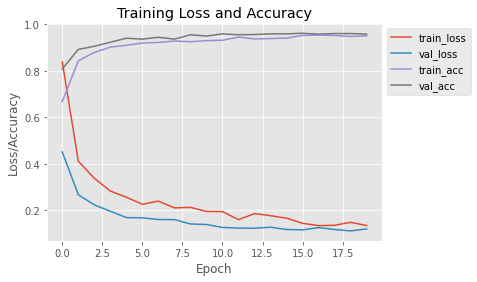

In [ ]:
# plot the training loss and accuracy graphs of training and validation 
N = epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), hist.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), hist.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), hist.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), hist.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Loss/Accuracy")
plt.legend(bbox_to_anchor=(1, 1))


In [ ]:
trainY

array([[0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       ...,
       [0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1]])